In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from sys import stdout
%matplotlib notebook
plt.rcParams['figure.figsize'] = [8,6]
plt.rcParams['figure.dpi'] = 200

In [2]:
def plotcircles():
    centres=Lattice[S==1]
    for i in range(len(centres)):
        cc = plt.Circle(centres[i], r ,fill=True, color='b',lw=0.5)
        ax.add_artist( cc )

In [3]:
def resetaxes():
    ax.cla()
    ax.set_xlim([0,3*N*r])
    ax.set_aspect(1)
    ax.set_ylim([0,2*N*r])

In [4]:
def generateTriangularLattice(N):
    a = np.array([1,0])
    b = np.array([1/2, np.sqrt(3)/2])
    triangularLattice = np.zeros((N*N,2))
    for i in range(N):
        for j in range(N):
            triangularLattice[N*i+j] = j*a + i*b
    return triangularLattice

# Void diffusion

In [5]:
def calcsurface():
    surf=[]
    hs=[]
    for i in range(N):
        idx=N**2-N+i
        h=0
        while S[idx]==0:
            idx=idx-N
            h=h+1
        surf.append(idx)
        hs.append(h)
    return surf,hs

In [6]:
potential=1
T=1
beta=1/T
def evolve():
    S[np.random.randint(N-1)*N+np.random.randint(N-1)+N+1]=0
    voids=np.nonzero(S==0)[0]
    surface,heights=calcsurface()
    for v in voids:
        p=np.array([np.exp(beta*potential/2),np.exp(-beta*potential/2),np.exp(beta*potential),np.exp(beta*potential/2),np.exp(-beta*potential),np.exp(-beta*potential/2)])
        p=p/np.sum(p)
        if v<N:
            temp=S[v]
            S[v]=S[v+N]
            S[v+N]=temp
            v=v+N
        if v%N==0:
            temp=S[v]
            S[v]=S[v+1]
            S[v+1]=temp
            v=v+1
        if v%N==N-1:
            temp=S[v]
            S[v]=S[v-1]
            S[v-1]=temp
            v=v-1
        if v>surface[v%N]:
            continue
        nbrs=np.array([v+1,v-1,v+N,v+N-1,v-N,v-N+1])
        p=p[(S[nbrs]==1)]
        nbrs=nbrs[(S[nbrs]==1)]
        for n in range(len(nbrs)):
            r=np.random.rand()
            if r<p[n]:
                S[nbrs[n]]=0
                S[v]=1
                break
    #print(surface)
    return len(voids)

In [7]:
potential=1
p=np.array([np.exp(beta*potential/2),np.exp(-beta*potential/2),np.exp(beta*potential),np.exp(beta*potential/2),np.exp(-beta*potential),np.exp(-beta*potential/2)])
p=p/np.sum(p)
p

array([0.21703224, 0.0798417 , 0.35782568, 0.21703224, 0.04842644,
       0.0798417 ])

<IPython.core.display.Javascript object>


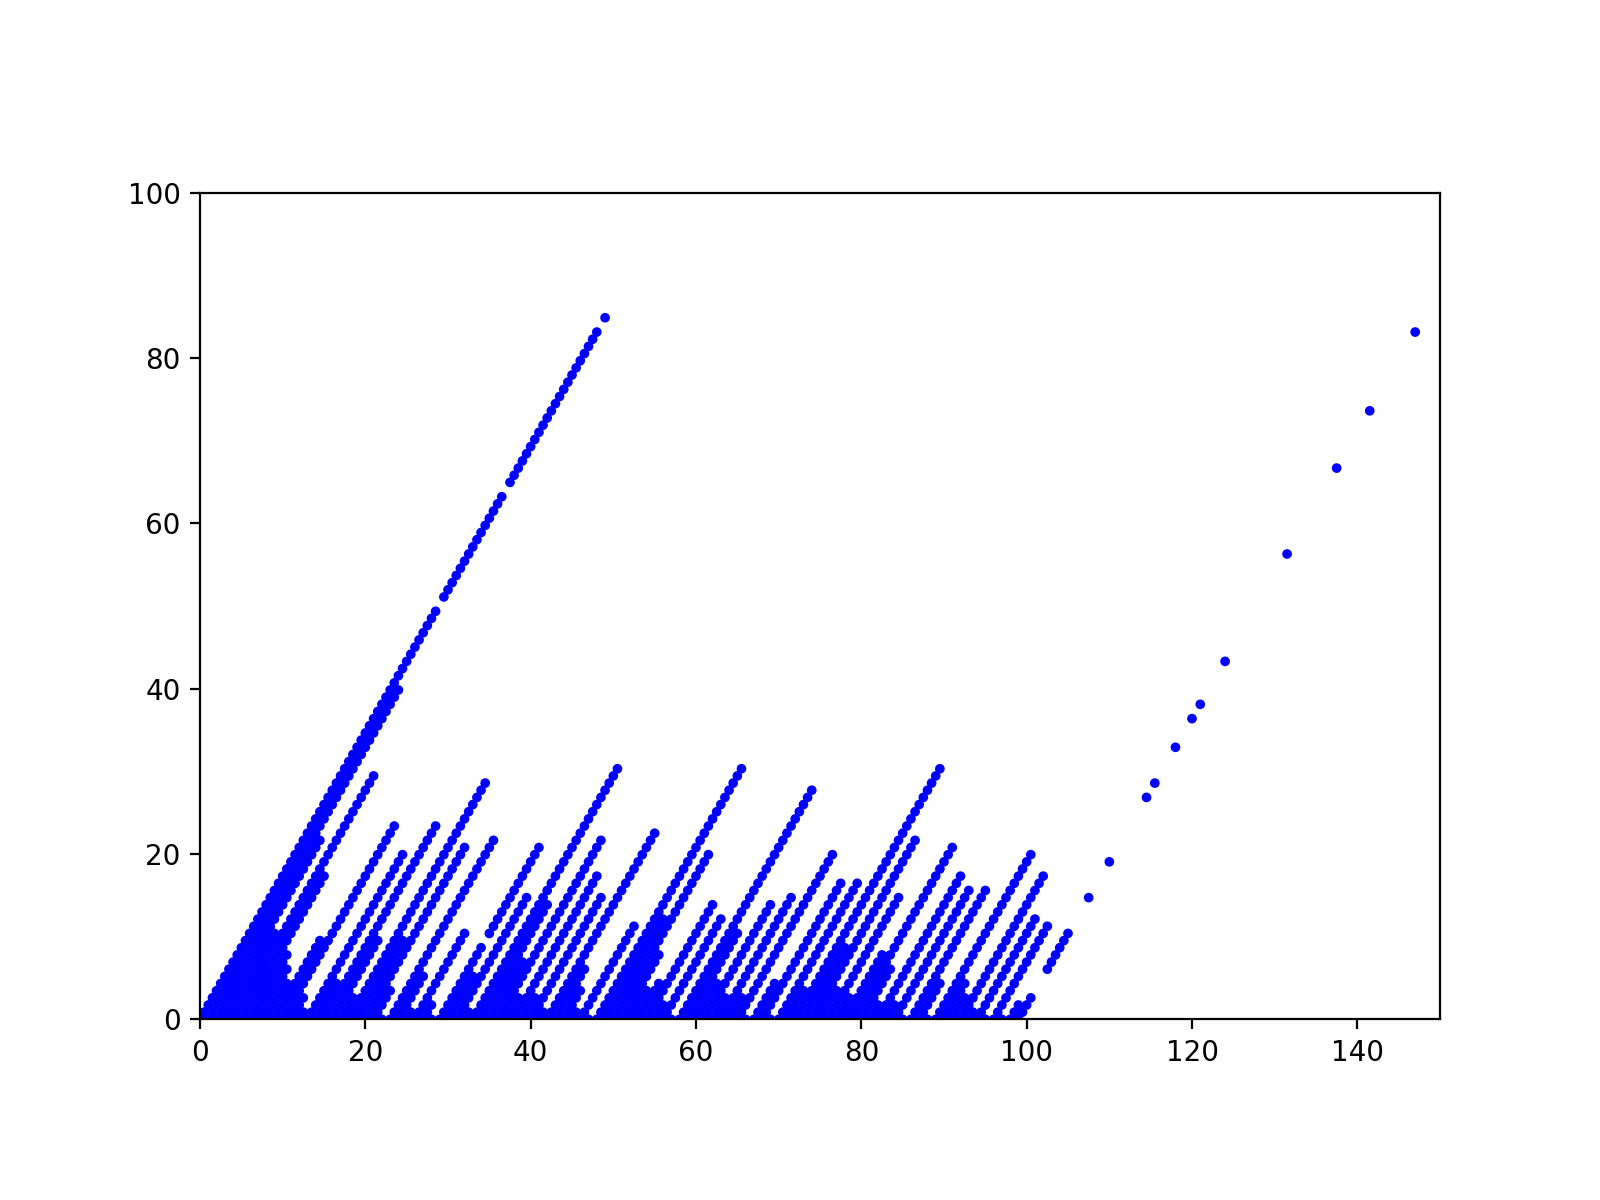

 time: 20540 , voids= 8611 

IndexError: index -10031 is out of bounds for axis 0 with size 10000

In [8]:
N=100
r=0.5
S=np.ones(N*N)
Lattice=generateTriangularLattice(N)
fig, ax = plt.subplots()
ax.set_xlim([0,3*N*r])
ax.set_aspect(1)
ax.set_ylim([0,2*N*r])
t=0
vno=0
while True:
    t+=1
    if t%10==0:
        stdout.write("\r time: {} , voids= {} ".format(t,vno))
        stdout.flush()
        resetaxes()
        plotcircles()
        fig.canvas.draw()
    vno=evolve()

In [20]:
nbrs

NameError: name 'nbrs' is not defined

In [22]:
surface

NameError: name 'surface' is not defined

# RANDOM DEPOSITION

In [10]:
def evolve(dep,x):
    settled=0
    v=dep*N+x
    while settled==0:
        S[v]=1
        nbrs=np.array([v+1,v-1,v+N,v+N-1,v-N,v-N+1])
        nbrs=nbrs%(N**2)
        nbrs=nbrs[(S[nbrs]==1)]
        if len(nbrs)>=1:
            settled=1
        else:
            S[v]=0
            S[v-N]=1
            v=v-N
    #print(surface)
    #return len(voids)

In [11]:
def calcsurface():
    surf=[]
    hs=[]
    for i in range(N):
        idx=i
        h=0
        while idx<N**2:
            if S[idx]==1:
                hmax=h
            idx=idx+N
            h=h+1
        surf.append(idx)
        hs.append(hmax)
    return surf,hs

<IPython.core.display.Javascript object>


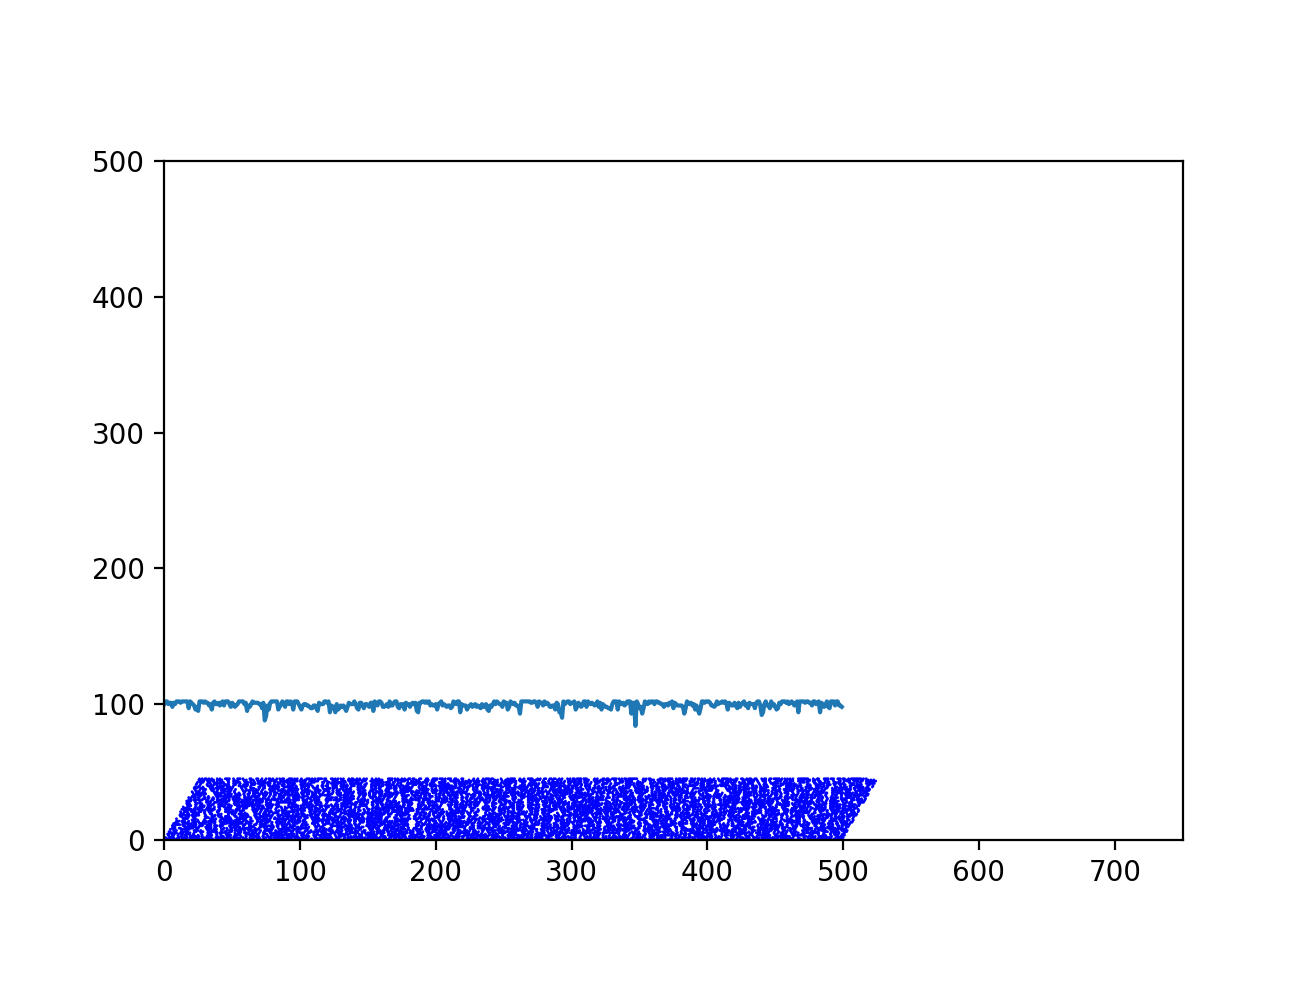

 time: 51

KeyboardInterrupt: 

In [13]:
N=500
r=0.5
S=np.zeros(N*N)
S[:N]=1
Lattice=generateTriangularLattice(N)
fig, ax = plt.subplots()
ax.set_xlim([0,3*N*r])
ax.set_aspect(1)
ax.set_ylim([0,2*N*r])
t=0
h_dep=5
hs=[]
while h_dep<N-1:
    stdout.write("\r time: {}".format(t))
    stdout.flush()
    surface,h=calcsurface()
    resetaxes()
    plotcircles()
    hs.append(h.copy())
    fig.canvas.draw()
    for i in range(N):
        x=np.random.randint(N)
        h_dep=np.max(h)+2
        evolve(h_dep,x)
    t+=1

In [14]:
#plt.figure()
plt.plot(h)

In [35]:
hs=np.array(hs)
#ts=range(len(hs))
ws=[]
L=N
ls=[int((L-50)/8),int((L-50)/16),int((L-50)/32),int((L-50)/64)]
for l in ls:
    w=[]
    for t in range(len(hs)):
        mean=np.mean(hs[t,:])
        s=[]
        for i in range(0,hs.shape[1]-l):
            ss=np.var(hs[t,i:i+l])
            s.append(ss)
        w.append(np.mean(s)**0.5)
    ws.append(w)

<IPython.core.display.Javascript object>


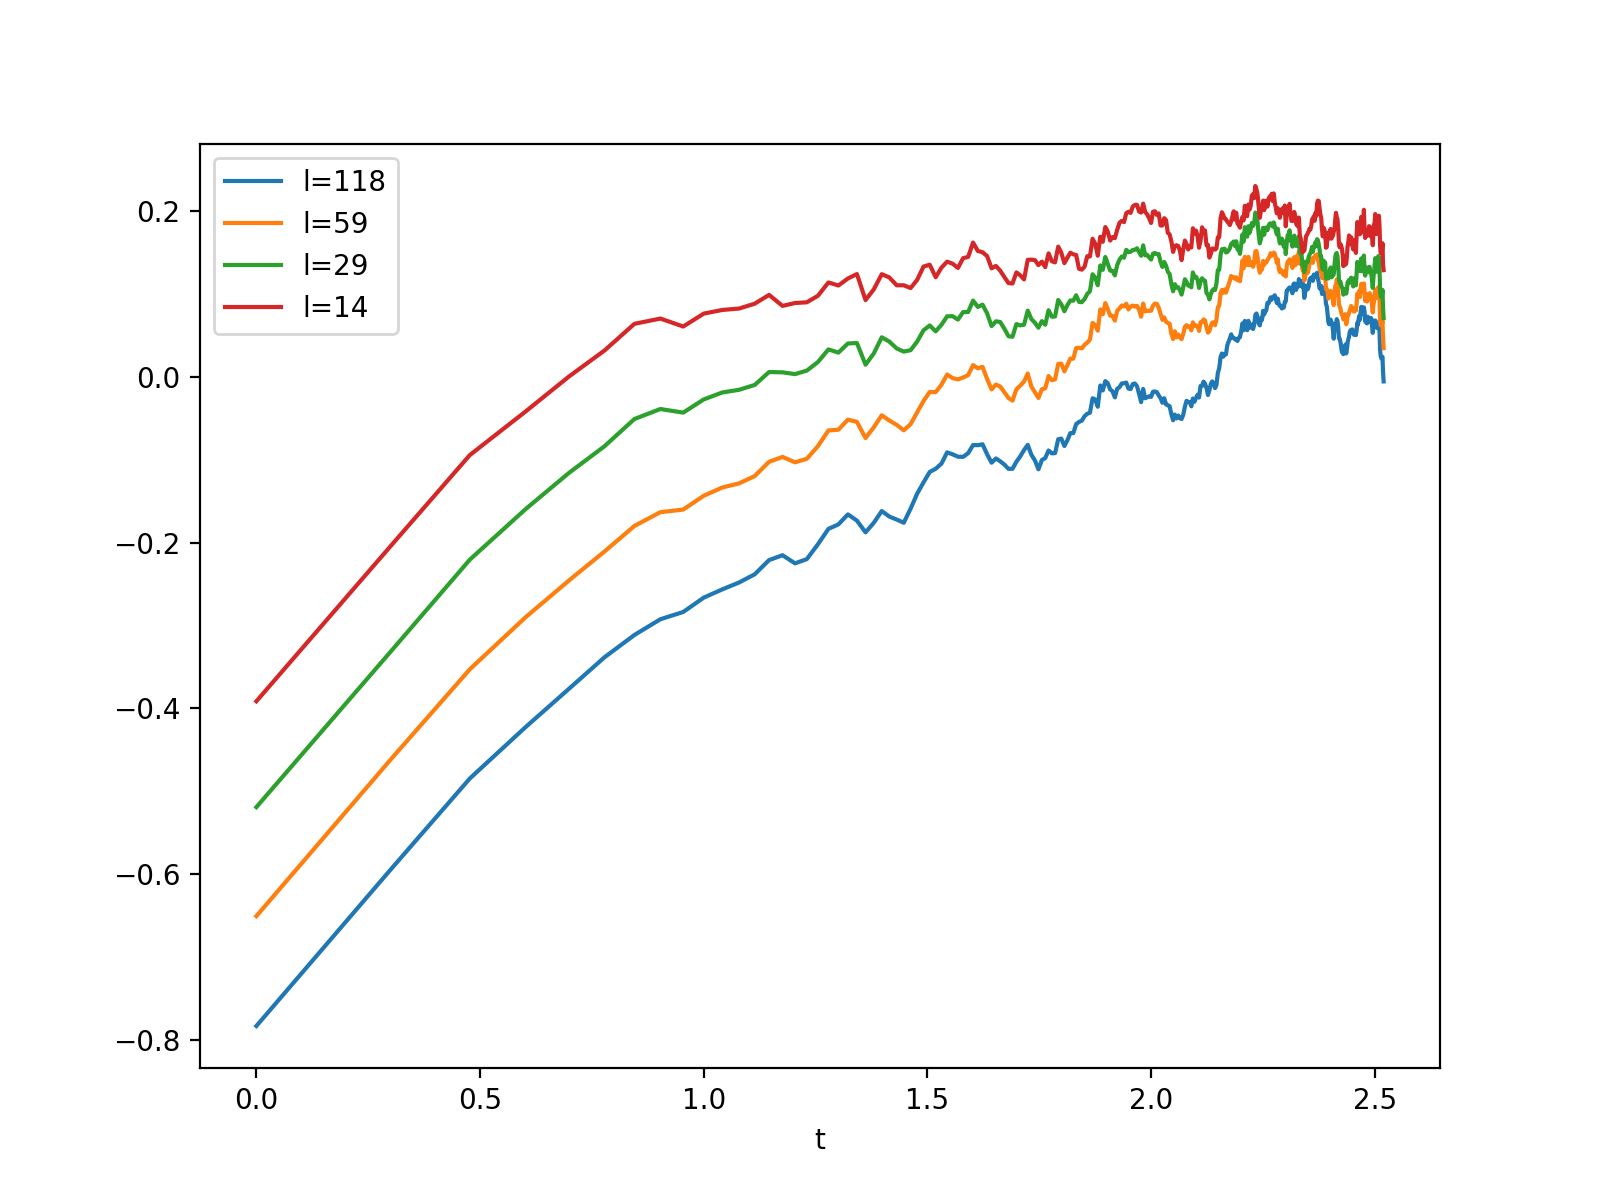

C:\Users\Anpuj\AppData\Local\Temp\ipykernel_16588\2451442793.py:8: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(range(len(hs))),np.log10(ws[i]*(ls[i]**(-a))),label='l={}'.format(ls[i]))
C:\Users\Anpuj\AppData\Local\Temp\ipykernel_16588\2451442793.py:8: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(range(len(hs))),np.log10(ws[i]*(ls[i]**(-a))),label='l={}'.format(ls[i]))
C:\Users\Anpuj\AppData\Local\Temp\ipykernel_16588\2451442793.py:8: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(range(len(hs))),np.log10(ws[i]*(ls[i]**(-a))),label='l={}'.format(ls[i]))
C:\Users\Anpuj\AppData\Local\Temp\ipykernel_16588\2451442793.py:8: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(range(len(hs))),np.log10(ws[i]*(ls[i]**(-a))),label='l={}'.format(ls[i]))


In [39]:
plt.figure()
plt.xlabel('t')
#plt.ylabel('l^(-0.5) * w_l(t)')
ws=np.array(ws)
a=0.45
b=0
for i in range(len(ls)):
    plt.plot(np.log10(range(len(hs))),np.log10(ws[i]*(ls[i]**(-a))),label='l={}'.format(ls[i]))
    #plt.plot(np.log10(ts*(ls[i]**(-1.5))),np.log10(ws[i]*(ts**(-0.33))),label='l={}'.format(ls[i]))
    plt.legend()

In [38]:
len(hs)

332